In [5]:
## Importando o necessário
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkplt
import bokeh.io as bkio
import bokeh.layouts as bklt
import bokeh.charts as bkcht
import bokeh.models as bkmdl
import bokeh.palettes as palette

## Definindo URLs necessárias
componentes_url = 'http://bit.do/componentes-curriculares'
componentes_disc_url = 'http://bit.ly/2yIvZLs' #'http://bit.do/componentes_curriculares_presenciais'
turmas_url = [('http://bit.do/turmas_20' + str(13+i) + '_1') for i in range(5)]
turmas_url = turmas_url + [('http://bit.do/turmas_20' + str(13+i) + '_2') for i in range(5)]
mat_comp_url = [('http://bit.do/mat_comp_20' + str(13+i) + '_1') for i in range(5)]
mat_comp_url = mat_comp_url + [('http://bit.do/mat_comp_20' + str(13+i) + '_2') for i in range(5)]
turmas_periodo = [('20' + str(13+i) + '.1') for i in range(5)]
turmas_periodo = turmas_periodo + [('20' + str(13+i) + '.2') for i in range(5)]

In [7]:
componentes = pd.read_csv(componentes_url,';')
componentes.head(2)

,id_curso,nome,id_coordenador,coordenador,situacao_curso,nivel_ensino,grau_academico,modalidade_educacao,area_conhecimento,tipo_oferta,...,municipio,campus,id_unidade_responsavel,unidade_responsavel,website,data_funcionamento,codigo_inep,dou,portaria_reconhecimento,convenio_academico
0,2000004,ADMINISTRAÇÃO,NaN,NaN,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,CURRAIS NOVOS,Campus Currais Novos,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,NaN,1978-09-15,12355.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN
1,2000002,ADMINISTRAÇÃO,24344.0,CARLOS ALBERTO FREIRE MEDEIROS,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,NATAL,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,http://sol.ccsa.ufrn.br/ccsa/areas/adm/adminis...,1971-09-16,12311.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN


In [8]:
disciplinas = pd.read_csv(componentes_disc_url,';')
disciplinas.head(2)

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
0,18642,DISCIPLINA,MUT721,T,LABORATÓRIOS ELETIVOS,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
1,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN


In [9]:
## Filtrando apenas o componente BTI
imd = disciplinas[disciplinas['codigo'].str.contains("IMD")]
imd.head(2)

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
17834,51954,MODULO,IMD0001,L,INOVAÇÃO TECNOLÓGICA,INSTITUTO METROPOLE DIGITAL,15,0,0,15,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE
18093,52247,MODULO,IMD0002,L,INOVAÇÃO TECNOLÓGICA,INSTITUTO METROPOLE DIGITAL,30,0,0,30,...,Conceito de inovação. Tipos de inovação. Relaç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE


In [10]:
## Fazendo Download dos CSVs das turmas
turmas_dfs = []
for url in turmas_url:
    print(url)
    turmas_dfs.append(pd.read_csv(url,';'))

http://bit.do/turmas_2013_1
http://bit.do/turmas_2014_1
http://bit.do/turmas_2015_1
http://bit.do/turmas_2016_1
http://bit.do/turmas_2017_1
http://bit.do/turmas_2013_2
http://bit.do/turmas_2014_2
http://bit.do/turmas_2015_2
http://bit.do/turmas_2016_2
http://bit.do/turmas_2017_2


In [11]:
## Fazendo Download dos CSVs das matriculas em componente curricular
mat_comp_dfs = []
for url in mat_comp_url:
    print(url)
    mat_comp_dfs.append(pd.read_csv(url,';'))

http://bit.do/mat_comp_2013_1
http://bit.do/mat_comp_2014_1
http://bit.do/mat_comp_2015_1
http://bit.do/mat_comp_2016_1
http://bit.do/mat_comp_2017_1
http://bit.do/mat_comp_2013_2
http://bit.do/mat_comp_2014_2
http://bit.do/mat_comp_2015_2
http://bit.do/mat_comp_2016_2
http://bit.do/mat_comp_2017_2


In [12]:
print(disciplinas.columns)
disciplinas.head()

Index(['id_componente', 'tipo_componente', 'codigo', 'nivel', 'nome',
       'unidade_responsavel', 'ch_teorico', 'ch_pratico', 'ch_estagio',
       'ch_total', 'ch_dedicada_docente', 'ch_ead', 'cr_max_ead',
       'permite_horario_flexivel', 'qtd_unidades', 'procedimentos_avaliacao',
       'equivalencia', 'pre_requisito', 'co_requisito', 'ementa',
       'bibliografia', 'objetivos', 'conteudo', 'competencias_habilidades',
       'referencias', 'ano_programa', 'periodo_programa', 'modalidade',
       'curso_componente'],
      dtype='object')


,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
0,18642,DISCIPLINA,MUT721,T,LABORATÓRIOS ELETIVOS,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
1,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
2,18644,DISCIPLINA,MUT516,T,CO-REPETIÇÃO,ESCOLA DE MÚSICA,30,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
3,18645,DISCIPLINA,MUT520,T,CONTRABAIXO ACÚSTICO I,ESCOLA DE MÚSICA,30,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
4,18646,DISCIPLINA,MUT165,T,PIANO COMPLEMENTAR I,ESCOLA DE MÚSICA,15,0,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN


In [13]:
## Facilitando a visualização do dataframe diminuindo o número das colunas
disc_cols = ['id_componente', 'tipo_componente', 'codigo', 'nivel', 'nome',
             'ch_total', 'ano_programa', 'periodo_programa', 'modalidade', 'curso_componente']
disciplinas = disciplinas[disc_cols]
disciplinas_bti = disciplinas[disciplinas['curso_componente'] == 'TECNOLOGIA DA INFORMAÇÃO']
disciplinas_bti.reset_index(inplace=True,drop='index')
disciplinas_bti.head()

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,ano_programa,periodo_programa,modalidade,curso_componente
0,52535,MODULO,IMD0015,G,TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE,30,2013.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO
1,52536,BLOCO,IMD0011,G,CIRCUITOS LÓGICOS,90,NaN,NaN,Presencial,TECNOLOGIA DA INFORMAÇÃO
2,52650,BLOCO,IMD0012,G,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,90,NaN,NaN,Presencial,TECNOLOGIA DA INFORMAÇÃO
3,52653,MODULO,IMD0013,G,ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO,90,2013.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO
4,52656,MODULO,IMD0014,G,INTRODUÇÃO AO CÁLCULO,60,2013.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO


In [14]:
## Fazendo a concatenação para trabalhar apenas com um DataFrame
turmas_df = pd.concat(turmas_dfs, keys=turmas_periodo)
## Filtrando o DataFrame para otimizar as buscas
turmas_df = turmas_df[turmas_df['nivel_ensino'] == 'GRADUAÇÃO']
turmas_df = turmas_df[turmas_df['modalidade_participantes'] == 'Presencial']
turmas_df = turmas_df[turmas_df['campus_turma'] == 'Campus Central']
turmas_df.reset_index(inplace=True,level=0)
turmas_df.reset_index(inplace=True,drop='index')
turmas_df['ano_periodo'] = turmas_df.level_0
print(turmas_df.columns)

Index(['level_0', 'id_turma', 'codigo_turma', 'id_docente_interno',
       'id_docente_externo', 'observacao', 'id_componente_curricular',
       'nivel_ensino', 'campus_turma', 'local', 'ano', 'periodo',
       'data_inicio', 'data_fim', 'descricao_horario', 'total_solicitacoes',
       'capacidade_aluno', 'tipo', 'distancia', 'data_consolidacao',
       'agrupadora', 'id_turma_agrupadora', 'qtd_aulas_lancadas',
       'situacao_turma', 'convenio', 'modalidade_participantes', 'Unnamed: 25',
       'ano_periodo'],
      dtype='object')


In [15]:
## Facilitando a visualização do dataframe diminuindo o número das colunas
colunas_turma = ['id_turma', 'codigo_turma', 'id_docente_interno', 'id_docente_externo', 'id_componente_curricular',
                 'ano_periodo', 'descricao_horario', 'tipo', 'situacao_turma']
turmas_df = turmas_df[colunas_turma]
turmas_df.reset_index(inplace=True,drop='index')
turmas_df.head()

,id_turma,codigo_turma,id_docente_interno,id_docente_externo,id_componente_curricular,ano_periodo,descricao_horario,tipo,situacao_turma
0,1196784,01,26322,NaN,46397.0,2013.1,5T3456,REGULAR,CONSOLIDADA
1,1196812,01,5.75559e+06,NaN,25562.0,2013.1,5M456,REGULAR,CONSOLIDADA
2,1196813,02,5.75428e+06,NaN,25562.0,2013.1,3T123,REGULAR,CONSOLIDADA
3,1196813,02,5.75405e+06,NaN,25562.0,2013.1,3T123,REGULAR,CONSOLIDADA
4,1196814,03,5.75509e+06,NaN,25562.0,2013.1,6T123,REGULAR,CONSOLIDADA


In [16]:
## Fazendo a concatenação para trabalhar com apenas um DataFrame
mat_comp_df = pd.concat(mat_comp_dfs, keys=turmas_periodo)
mat_comp_df.reset_index(inplace=True,level=0)
mat_comp_df.reset_index(inplace=True,drop='index')
mat_comp_df['ano_periodo'] = mat_comp_df.level_0
print(mat_comp_df.columns)

Index(['level_0', 'Unnamed: 10', 'descricao', 'discente', 'faltas_unidade',
       'id_curso', 'id_turma', 'media_final', 'nota', 'numero_total_faltas',
       'reposicao', 'unidade', 'ano_periodo'],
      dtype='object')


In [17]:
## Filtrando apenas o componente BTI
bti = componentes[componentes['nome'] == 'TECNOLOGIA DA INFORMAÇÃO']
bti.reset_index(drop='index',inplace=True)
bti.head()

,id_curso,nome,id_coordenador,coordenador,situacao_curso,nivel_ensino,grau_academico,modalidade_educacao,area_conhecimento,tipo_oferta,...,municipio,campus,id_unidade_responsavel,unidade_responsavel,website,data_funcionamento,codigo_inep,dou,portaria_reconhecimento,convenio_academico
0,92127264,TECNOLOGIA DA INFORMAÇÃO,5756802.0,GUSTAVO GIRAO BARRETO DA SILVA,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Exatas e da Terra,Regular,...,NATAL,NaN,6069,INSTITUTO METROPOLE DIGITAL,NaN,NaN,1190414.0,2016-05-02,Portaria nº 127/2016 - MEC,NaN


In [18]:
## Filtrando pelo id do bti
mat_comp_bti = mat_comp_df[mat_comp_df['id_curso'] == bti['id_curso'][0]]
## Limpando DataFrame
colunas_mat_comp_bti = ['id_turma', 'descricao', 'discente', 'media_final',
                        'nota', 'reposicao', 'unidade', 'ano_periodo']
mat_comp_bti = mat_comp_bti[colunas_mat_comp_bti]
mat_comp_bti.reset_index(inplace=True,drop='index')
mat_comp_bti.head()

,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
0,1203381,TRANCADO,da437177e090ab90ea33ba772cfbae03,NaN,2.6,f,1.0,2013.1
1,1203381,TRANCADO,da437177e090ab90ea33ba772cfbae03,NaN,NaN,f,2.0,2013.1
2,1203381,TRANCADO,da437177e090ab90ea33ba772cfbae03,NaN,NaN,f,3.0,2013.1
3,1203381,APROVADO,59d9aee9a3b15f0b735e28fe4a692a8e,7.0,7.1,f,1.0,2013.1
4,1203381,APROVADO,59d9aee9a3b15f0b735e28fe4a692a8e,7.0,6.0,f,2.0,2013.1


In [19]:
## Filtrando as disciplinas de FMC I e FMC II
fmc = disciplinas_bti[disciplinas_bti['nome'] == 'ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO']
fmc = fmc.append(disciplinas_bti[disciplinas_bti['nome'].str.contains('FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO')])
print(fmc.nome.unique())

['ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO'
 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO'
 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I'
 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II']


In [20]:
fmc1 = fmc[fmc['nome'] == 'ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO']
fmc1 = fmc1.append(fmc[fmc['nome'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I'])
fmc2 = fmc[fmc['nome'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO']
fmc2 = fmc2.append(fmc[fmc['nome'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II'])
print(fmc1.codigo.unique())
print(fmc2.codigo.unique())

['IMD0013' 'IMD0028']
['IMD0023' 'IMD0038']


In [21]:
turmas_fmc2 = []
for cod in fmc2['id_componente'].unique():
    turmas_fmc2.append(turmas_df[turmas_df['id_componente_curricular'] == cod])
turmas_fmc2 = pd.concat(turmas_fmc2, keys=fmc2['id_componente'].unique())
turmas_fmc2.reset_index(inplace=True,level=0)
turmas_fmc2.reset_index(inplace=True,drop='index')
turmas_fmc2.head(2)

,level_0,id_turma,codigo_turma,id_docente_interno,id_docente_externo,id_componente_curricular,ano_periodo,descricao_horario,tipo,situacao_turma
0,55025,1239537,01,25889,NaN,55025.0,2015.1,246N12 (02/02/2015 - 20/06/2015),REGULAR,CONSOLIDADA
1,55025,1239541,02,24798,NaN,55025.0,2015.1,246M34 (02/02/2015 - 20/06/2015),REGULAR,CONSOLIDADA


In [22]:
## Capturando os alunos de FMC II
alunos_fmc2 = []
for cod in turmas_fmc2['id_turma'].unique():
    alunos_fmc2.append(mat_comp_bti[mat_comp_bti['id_turma'] == np.int64(cod)])
alunos_fmc2 = pd.concat(alunos_fmc2, keys=turmas_fmc2['id_turma'].unique())
alunos_fmc2.reset_index(inplace=True,level=0)
alunos_fmc2.reset_index(inplace=True,drop='index')
alunos_fmc2.head(3)

,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
0,1239537,1239537,APROVADO,46665a614e41672cc0e7ab15d2acacf1,8.7,8.3,f,1.0,2015.1
1,1239537,1239537,APROVADO,46665a614e41672cc0e7ab15d2acacf1,8.7,8.5,f,2.0,2015.1
2,1239537,1239537,APROVADO,46665a614e41672cc0e7ab15d2acacf1,8.7,9.2,f,3.0,2015.1


In [23]:
unidade1 = alunos_fmc2[alunos_fmc2['unidade'] == 1.0]
unidade2 = alunos_fmc2[alunos_fmc2['unidade'] == 2.0]
unidade3 = alunos_fmc2[alunos_fmc2['unidade'] == 3.0]
unidade1.reset_index(drop='index',level=0,inplace=True)
unidade2.reset_index(drop='index',level=0,inplace=True)
unidade3.reset_index(drop='index',level=0,inplace=True)
alunos_fmc2_u1_df = unidade1.drop(['level_0','reposicao','unidade'],axis=1)
alunos_fmc2_u2_df = unidade2.drop(['level_0','reposicao','unidade'],axis=1)
alunos_fmc2_u3_df = unidade3.drop(['level_0','reposicao','unidade'],axis=1)

print(alunos_fmc2_u1_df.descricao.unique())
alunos_fmc2_u1_df.head(3)


['APROVADO' 'APROVADO POR NOTA' 'REPROVADO'
 'REPROVADO POR MÉDIA E POR FALTAS' 'CANCELADO' 'EXCLUIDA' 'TRANCADO'
 'MATRICULADO' 'DESISTENCIA']


,id_turma,descricao,discente,media_final,nota,ano_periodo
0,1239537,APROVADO,46665a614e41672cc0e7ab15d2acacf1,8.7,8.3,2015.1
1,1239537,APROVADO POR NOTA,7f526a2061ee189867da31102097f91e,5.2,4.2,2015.1
2,1239537,APROVADO POR NOTA,f3ac5d986b7350a02d63a22510377d73,5.9,3.0,2015.1


In [24]:
## mantendo apenas os alunos que concluiram a disciplina
alunos_fmc2_u1_df = alunos_fmc2_u1_df[alunos_fmc2_u1_df['descricao'].str.contains('APROVADO') |
                                      alunos_fmc2_u1_df['descricao'].str.contains('REPROVADO')]
alunos_fmc2_u2_df = alunos_fmc2_u2_df[alunos_fmc2_u2_df['descricao'].str.contains('APROVADO') |
                                      alunos_fmc2_u2_df['descricao'].str.contains('REPROVADO')]
alunos_fmc2_u3_df = alunos_fmc2_u3_df[alunos_fmc2_u3_df['descricao'].str.contains('APROVADO') |
                                      alunos_fmc2_u3_df['descricao'].str.contains('REPROVADO')]
print(alunos_fmc2_u1_df.descricao.unique())
alunos_fmc2_u1_df.head(3)

['APROVADO' 'APROVADO POR NOTA' 'REPROVADO'
 'REPROVADO POR MÉDIA E POR FALTAS']


,id_turma,descricao,discente,media_final,nota,ano_periodo
0,1239537,APROVADO,46665a614e41672cc0e7ab15d2acacf1,8.7,8.3,2015.1
1,1239537,APROVADO POR NOTA,7f526a2061ee189867da31102097f91e,5.2,4.2,2015.1
2,1239537,APROVADO POR NOTA,f3ac5d986b7350a02d63a22510377d73,5.9,3.0,2015.1


In [25]:
## Calculando as médias e desvios padrões por unidades
media_fmc2 = {'media_geral' : np.mean(alunos_fmc2['media_final']),
         'media_unidade1' : np.mean(alunos_fmc2_u1_df['nota']),
         'media_unidade2' : np.mean(alunos_fmc2_u2_df['nota']),
         'media_unidade3' : np.mean(alunos_fmc2_u3_df['nota'])}
std_fmc2 = {'desvio_padrao' : np.std(alunos_fmc2['media_final']),
       'desvio_padrao_u1' : np.std(alunos_fmc2_u1_df['nota']),
       'desvio_padrao_u2' : np.std(alunos_fmc2_u2_df['nota']),
       'desvio_padrao_u3' : np.std(alunos_fmc2_u3_df['nota'])}
medias_fmc2 = pd.DataFrame.from_dict(media_fmc2,orient='index')
stds_fmc2 = pd.DataFrame.from_dict(std_fmc2,orient='index')
medias_fmc2 = pd.DataFrame.transpose(medias_fmc2);
stds_fmc2 = pd.DataFrame.transpose(stds_fmc2);

medias_fmc2_df = pd.concat([medias_fmc2,stds_fmc2],axis=1)
medias_fmc2_df = medias_fmc2_df.dropna()
medias_fmc2_df

,media_geral,media_unidade1,media_unidade2,media_unidade3,desvio_padrao,desvio_padrao_u1,desvio_padrao_u2,desvio_padrao_u3
0,2.7666,3.053744,2.723128,2.540529,2.704475,2.637742,2.995006,3.073023


In [100]:
mediana_fmc2 = {'mediana_geral' : np.median(alunos_fmc2['media_final'].dropna()),
         'mediana_unidade1' : np.median(alunos_fmc2_u1_df['nota']),
         'mediana_unidade2' : np.median(alunos_fmc2_u2_df['nota']),
         'mediana_unidade3' : np.median(alunos_fmc2_u3_df['nota'])}
mediana_fmc2

{'mediana_geral': 1.5,
 'mediana_unidade1': 2.5,
 'mediana_unidade2': 1.7000000500000001,
 'mediana_unidade3': 0.0}

In [26]:
def z_score(mean, std_dev):

    ## casting axis x values to int
    mean = int(mean*10)
    std_dev = int(std_dev*10)

    axis_x = [i*1.0 for i in range(0,100)]

    xi = bkmdl.widgets.Slider(title='xi',start=0,end=100,step=1,value=50)
    ## return the cumulative value from Z-Table
    cdf = stats.norm.cdf(int(xi.value),mean, std_dev)

    ## widget to show probability
    prob = bkmdl.widgets.TextInput(title='cdf',value=str(cdf))

    ## -2std, -std, std, 2std 
    minus2std = int(mean - 2*std_dev)
    minusstd = int(mean - std_dev)
    plus1std = int(mean + std_dev)
    plus2std = int(mean + 2*std_dev)

    ## mark points in the plot
    markers_points = [minus2std, minusstd, mean, plus1std, plus2std]

    ## find the probability distribution function
    pdf = stats.norm.pdf(axis_x,mean,std_dev)

    hover = bkmdl.HoverTool(tooltips=[('Nota','$x')])

    plot = bkplt.figure(plot_width=450, plot_height=450, tools=[hover])

    ## sources
    pdf_source = bkmdl.ColumnDataSource(dict(x=axis_x,y=pdf))
    xi_source = bkmdl.ColumnDataSource(dict(x=[int(xi.value) for i in pdf],y=pdf))
    mean_source = bkmdl.ColumnDataSource(dict(x=[mean],y=[pdf[mean]]))
    if minus2std > 0:
        minus2std_source = bkmdl.ColumnDataSource(dict(x=[minus2std],y=[pdf[minus2std]]))
    if minusstd > 0:
        minusstd_source = bkmdl.ColumnDataSource(dict(x=[minusstd],y=[pdf[minusstd]]))
    if plus1std < 100:
        plus1std_source = bkmdl.ColumnDataSource(dict(x=[plus1std],y=[pdf[plus1std]]))
    if plus2std < 100:
        plus2std_source = bkmdl.ColumnDataSource(dict(x=[plus2std],y=[pdf[plus2std]]))

    ## plots
    plot.line('x', 'y', color='blue', source=pdf_source)
    plot.line('x', 'y', color='orange',source=xi_source)
    plot.diamond('x', 'y', legend='media', color='green', size=10, source=mean_source)
    if minus2std > 0:
        plot.diamond('x', 'y', legend='-2*desvio', color='cyan', size=10, source=minus2std_source)
    if minusstd > 0:
        plot.diamond('x', 'y', legend='-desvio', color='purple', size=10, source=minusstd_source)
    if plus1std < 100:
        plot.diamond('x', 'y', legend='desvio', color='red', size=10, source=plus1std_source)
    if plus2std < 100:
        plot.diamond('x', 'y', legend='2*desvio', color='pink', size=10, source=plus2std_source)
        
    
    def update_xi(attrname, old, new):
        # Generate the new line
        source.data = dict(x=[int(xi.value) for i in pdf],y=pdf)
        
        cdf = stats.norm.cdf(int(xi.value),mean, std_dev)
        prob.value = str(cdf)


    xi.on_change('value',update_xi)

    graph = bklt.column(bklt.widgetbox(xi,prob),plot)

    bkio.output_notebook()
    
    return graph

In [27]:
## Ploting interactive graphics with bokeh
## points under analises
mean_u1 = (medias_fmc2_df['media_unidade1'])
std_dev_u1 = (medias_fmc2_df['desvio_padrao_u1'])
graph_u1 = z_score(mean_u1,std_dev_u1)

mean_u2 = (medias_fmc2_df['media_unidade2'])
std_dev_u2 = (medias_fmc2_df['desvio_padrao_u2'])
graph_u2 = z_score(mean_u2,std_dev_u2)

mean_u3 = (medias_fmc2_df['media_unidade3'])
std_dev_u3 = (medias_fmc2_df['desvio_padrao_u3'])
graph_u3 = z_score(mean_u3,std_dev_u1)

mean = (medias_fmc2_df['media_geral'])
std_dev = (medias_fmc2_df['desvio_padrao'])
graph_geral = z_score(mean,std_dev)

panel_u1 = bkmdl.Panel(child=graph_u1,title='Unidade 1')
panel_u2 = bkmdl.Panel(child=graph_u2,title='Unidade 2')
panel_u3 = bkmdl.Panel(child=graph_u3,title='Unidade 3')
panel = bkmdl.Panel(child=graph_geral,title='Média')

tabs = bkmdl.widgets.Tabs(tabs=[panel_u1,panel_u2,panel_u3,panel])
bkio.show(tabs)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

In [28]:
turmas = list(alunos_fmc2['ano_periodo'].unique())
turmas

['2015.1', '2016.1', '2017.1', '2014.2', '2015.2', '2016.2', '2017.2']

In [29]:
alunos_fmc2.head(2)

,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
0,1239537,1239537,APROVADO,46665a614e41672cc0e7ab15d2acacf1,8.7,8.3,f,1.0,2015.1
1,1239537,1239537,APROVADO,46665a614e41672cc0e7ab15d2acacf1,8.7,8.5,f,2.0,2015.1


# Separando as turmas por semestre

In [30]:
alunos_2014_2 = alunos_fmc2[alunos_fmc2['ano_periodo'].str.contains('2014.2')]
alunos_2015_1 = alunos_fmc2[alunos_fmc2['ano_periodo'].str.contains('2015.1')]
alunos_2015_2 = alunos_fmc2[alunos_fmc2['ano_periodo'].str.contains('2015.2')]
alunos_2016_1 = alunos_fmc2[alunos_fmc2['ano_periodo'].str.contains('2016.1')]
alunos_2016_2 = alunos_fmc2[alunos_fmc2['ano_periodo'].str.contains('2016.2')]
alunos_2017_1 = alunos_fmc2[alunos_fmc2['ano_periodo'].str.contains('2017.1')]

In [31]:
alunos_2014_2['descricao'].unique()

array(['REPROVADO POR MÉDIA E POR FALTAS', 'REPROVADO', 'EXCLUIDA',
       'APROVADO POR NOTA', 'APROVADO', 'CANCELADO', 'TRANCADO',
       'DESISTENCIA'], dtype=object)

# Pegando os alunos que foram aprovados ou reprovados na disciplina

In [32]:
alunos_2014_2 = alunos_2014_2[alunos_2014_2['descricao'].str.contains('APROVADO') |
                                      alunos_2014_2['descricao'].str.contains('REPROVADO')]
alunos_2015_1 = alunos_2015_1[alunos_2015_1['descricao'].str.contains('APROVADO') |
                                      alunos_2015_1['descricao'].str.contains('REPROVADO')]
alunos_2015_2 = alunos_2015_2[alunos_2015_2['descricao'].str.contains('APROVADO') |
                                      alunos_2015_2['descricao'].str.contains('REPROVADO')]
alunos_2016_1 = alunos_2016_1[alunos_2016_1['descricao'].str.contains('APROVADO') |
                                      alunos_2016_1['descricao'].str.contains('REPROVADO')]
alunos_2016_2 = alunos_2016_2[alunos_2016_2['descricao'].str.contains('APROVADO') |
                                      alunos_2016_2['descricao'].str.contains('REPROVADO')]
alunos_2017_1 = alunos_2017_1[alunos_2017_1['descricao'].str.contains('APROVADO') |
                                      alunos_2017_1['descricao'].str.contains('REPROVADO')]

alunos_2014_2.head(2)

,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
955,1228411,1228411,REPROVADO POR MÉDIA E POR FALTAS,46ca5bcc0383d2734d26bf3bcc201b5a,0.7,2.0,f,1.0,2014.2
956,1228411,1228411,REPROVADO POR MÉDIA E POR FALTAS,46ca5bcc0383d2734d26bf3bcc201b5a,0.7,0.0,f,2.0,2014.2


# Separando as turmas pelo ID

In [33]:
turmas_2014_2 = list(alunos_2014_2['id_turma'].unique())
print("As turmas de fmc II em 2014.2 foram: ", turmas_2014_2)
alunos_2014_2_t1 = alunos_2014_2[alunos_2014_2['id_turma'] == turmas_2014_2[0]]
print("A quantidade de alunos da turma 1 de 2014.2 foi: ", len(alunos_2014_2_t1))
alunos_2014_2_t2 = alunos_2014_2[alunos_2014_2['id_turma'] == turmas_2014_2[1]]
print("A quantidade de alunos da turma 2 de 2014.2 foi: ",len(alunos_2014_2_t2))

As turmas de fmc II em 2014.2 foram:  [1228411, 1228412]
A quantidade de alunos da turma 1 de 2014.2 foi:  75
A quantidade de alunos da turma 2 de 2014.2 foi:  90


In [34]:
turmas_2015_1 = list(alunos_2015_1['id_turma'].unique())
print("As turmas de fmc II em 2015.1 foram: ", turmas_2015_1)
alunos_2015_1_t1 = alunos_2015_1[alunos_2015_1['id_turma'] == turmas_2015_1[0]]
print("A quantidade de alunos da turma 1 de 2015.1 foi: ", len(alunos_2015_1_t1))
alunos_2015_1_t2 = alunos_2015_1[alunos_2015_1['id_turma'] == turmas_2015_1[1]]
print("A quantidade de alunos da turma 2 de 2015.1 foi: ",len(alunos_2015_1_t2))

As turmas de fmc II em 2015.1 foram:  [1239537, 1239541]
A quantidade de alunos da turma 1 de 2015.1 foi:  99
A quantidade de alunos da turma 2 de 2015.1 foi:  96


In [35]:
turmas_2015_2 = list(alunos_2015_2['id_turma'].unique())
print("As turmas de fmc II em 2015.2 foram: ", turmas_2015_2)
alunos_2015_2_t1 = alunos_2015_2[alunos_2015_2['id_turma'] == turmas_2015_2[0]]
print("A quantidade de alunos da turma 1 de 2015.2 foi: ", len(alunos_2015_2_t1))
alunos_2015_2_t2 = alunos_2015_2[alunos_2015_2['id_turma'] == turmas_2015_2[1]]
print("A quantidade de alunos da turma 2 de 2015.2 foi: ",len(alunos_2015_2_t2))

As turmas de fmc II em 2015.2 foram:  [57564855, 57564858]
A quantidade de alunos da turma 1 de 2015.2 foi:  54
A quantidade de alunos da turma 2 de 2015.2 foi:  129


In [36]:
turmas_2016_1 = list(alunos_2016_1['id_turma'].unique())
print("As turmas de fmc II em 2016.1 foram: ", turmas_2016_1)
alunos_2016_1_t1 = alunos_2016_1[alunos_2016_1['id_turma'] == turmas_2016_1[0]]
print("A quantidade de alunos da turma 1 de 2016.1 foi: ", len(alunos_2016_1_t1))
alunos_2016_1_t2 = alunos_2016_1[alunos_2016_1['id_turma'] == turmas_2016_1[1]]
print("A quantidade de alunos da turma 2 de 2016.1 foi: ",len(alunos_2016_1_t2))
alunos_2016_1_t3 = alunos_2016_1[alunos_2016_1['id_turma'] == turmas_2016_1[2]]
print("A quantidade de alunos da turma 3 de 2016.1 foi: ",len(alunos_2016_1_t3))

As turmas de fmc II em 2016.1 foram:  [57576738, 57579587, 57579588]
A quantidade de alunos da turma 1 de 2016.1 foi:  108
A quantidade de alunos da turma 2 de 2016.1 foi:  72
A quantidade de alunos da turma 3 de 2016.1 foi:  93


In [37]:
turmas_2016_2 = list(alunos_2016_2['id_turma'].unique())
print("As turmas de fmc II em 2016.2 foram: ", turmas_2016_2)
alunos_2016_2_t1 = alunos_2016_2[alunos_2016_2['id_turma'] == turmas_2016_2[0]]
print("A quantidade de alunos da turma 1 de 2016.2 foi: ", len(alunos_2016_2_t1))
alunos_2016_2_t2 = alunos_2016_2[alunos_2016_2['id_turma'] == turmas_2016_2[1]]
print("A quantidade de alunos da turma 2 de 2016.2 foi: ",len(alunos_2016_2_t2))

As turmas de fmc II em 2016.2 foram:  [57586396, 57586397]
A quantidade de alunos da turma 1 de 2016.2 foi:  156
A quantidade de alunos da turma 2 de 2016.2 foi:  147


In [38]:
turmas_2017_1 = list(alunos_2017_1['id_turma'].unique())
print("As turmas de fmc II em 2017.1 foram: ", turmas_2017_1)
alunos_2017_1_t1 = alunos_2017_1[alunos_2017_1['id_turma'] == turmas_2017_1[0]]
print("A quantidade de alunos da turma 1 de 2017.1 foi: ", len(alunos_2017_1_t1))
alunos_2017_1_t2 = alunos_2017_1[alunos_2017_1['id_turma'] == turmas_2017_1[1]]
print("A quantidade de alunos da turma 2 de 2017.1 foi: ",len(alunos_2017_1_t2))

As turmas de fmc II em 2017.1 foram:  [57597922, 57597928]
A quantidade de alunos da turma 1 de 2017.1 foi:  114
A quantidade de alunos da turma 2 de 2017.1 foi:  129


# Calculando a quantidade de aprovados e reprovados em cada semestre

In [39]:
aprovados_2014_2_t1 = alunos_2014_2_t1[alunos_2014_2_t1['descricao'].str.contains('APROVADO')]
n_aprovados_t1 = len(aprovados_2014_2_t1)/3
reprovados_2014_2_t1 = alunos_2014_2_t1[alunos_2014_2_t1['descricao'].str.contains('REPROVADO')]
n_reprovados_t1 = len(reprovados_2014_2_t1)/3
print("A quantidade de alunos aprovados na disciplina em 2014.2 foi (turma 1): ", n_aprovados_t1)
print("A quantidade de alunos reprovados na disciplina em 2014.2 foi (turma 1): ", n_reprovados_t1)
aprovados_2014_2 = alunos_2014_2_t2[alunos_2014_2_t2['descricao'].str.contains('APROVADO')]
n_aprovados_t2 = len(aprovados_2014_2)/3
reprovados_2014_2 = alunos_2014_2_t2[alunos_2014_2_t2['descricao'].str.contains('REPROVADO')]
n_reprovados_t2 = len(reprovados_2014_2)/3
print("A quantidade de alunos aprovados na disciplina em 2014.2 foi (turma 2): ", n_aprovados_t2)
print("A quantidade de alunos reprovados na disciplina em 2014.2 foi (turma 2): ", n_reprovados_t2)

print("O percentual de aprovação na 1a turma de 2014.2 foi: ", n_aprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de reprovação na 1a turma de 2014.2 foi: ", n_reprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de aprovação na 2a turma de 2014.2 foi: ", n_aprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("O percentual de reprovação na 2a turma de 2014.2 foi: ", n_reprovados_t2/(n_aprovados_t2+n_reprovados_t2))

A quantidade de alunos aprovados na disciplina em 2014.2 foi (turma 1):  13.0
A quantidade de alunos reprovados na disciplina em 2014.2 foi (turma 1):  12.0
A quantidade de alunos aprovados na disciplina em 2014.2 foi (turma 2):  21.0
A quantidade de alunos reprovados na disciplina em 2014.2 foi (turma 2):  9.0
O percentual de aprovação na 1a turma de 2014.2 foi:  0.52
O percentual de reprovação na 1a turma de 2014.2 foi:  0.48
O percentual de aprovação na 2a turma de 2014.2 foi:  0.7
O percentual de reprovação na 2a turma de 2014.2 foi:  0.3


In [40]:
#Desenhando um gráfico de pizza

def plota_pizza(n_aprovados, n_reprovados):
    labels = 'Aprovado', 'Reprovado'   
    titulos = [n_aprovados, n_reprovados]
    cores = ['green','red']
    explode = (0.1, 0)  # somente explode primeiro pedaço 
    total = sum(titulos)
    plt.pie(titulos, explode=explode, labels=labels, colors=cores,         autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
    plt.axis('equal')
    plt.show()


# Turma 1 de 2014.2

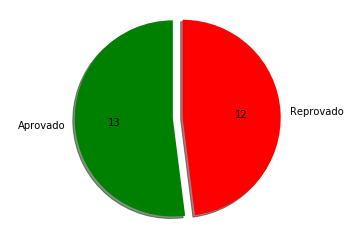

In [41]:
plota_pizza(n_aprovados_t1, n_reprovados_t1)

# Turma 2 de 2014.2

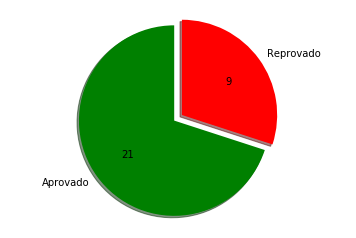

In [42]:
plota_pizza(n_aprovados_t2, n_reprovados_t2)

In [43]:
aprovados_2015_1_t1 = alunos_2015_1_t1[alunos_2015_1_t1['descricao'].str.contains('APROVADO')]
n_aprovados_t1 = len(aprovados_2015_1_t1)/3
reprovados_2015_1_t1 = alunos_2015_1_t1[alunos_2015_1_t1['descricao'].str.contains('REPROVADO')]
n_reprovados_t1 = len(reprovados_2015_1_t1)/3
print("A quantidade de alunos aprovados na disciplina em 2015.1 foi (turma 1): ", n_aprovados_t1)
print("A quantidade de alunos reprovados na disciplina em 2015.1 foi (turma 1): ", n_reprovados_t1)
aprovados_2015_1 = alunos_2015_1_t2[alunos_2015_1_t2['descricao'].str.contains('APROVADO')]
n_aprovados_t2 = len(aprovados_2015_1)/3
reprovados_2015_1 = alunos_2015_1_t2[alunos_2015_1_t2['descricao'].str.contains('REPROVADO')]
n_reprovados_t2 = len(reprovados_2015_1)/3
print("A quantidade de alunos aprovados na disciplina em 2015.1 foi (turma 2): ", n_aprovados_t2)
print("A quantidade de alunos reprovados na disciplina em 2015.1 foi (turma 2): ", n_reprovados_t2)

print("O percentual de aprovação na 1a turma de 2015.1 foi: ", n_aprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de reprovação na 1a turma de 2015.1 foi: ", n_reprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de aprovação na 2a turma de 2015.1 foi: ", n_aprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("O percentual de reprovação na 2a turma de 2015.1 foi: ", n_reprovados_t2/(n_aprovados_t2+n_reprovados_t2))

A quantidade de alunos aprovados na disciplina em 2015.1 foi (turma 1):  23.0
A quantidade de alunos reprovados na disciplina em 2015.1 foi (turma 1):  10.0
A quantidade de alunos aprovados na disciplina em 2015.1 foi (turma 2):  18.0
A quantidade de alunos reprovados na disciplina em 2015.1 foi (turma 2):  14.0
O percentual de aprovação na 1a turma de 2015.1 foi:  0.696969696969697
O percentual de reprovação na 1a turma de 2015.1 foi:  0.30303030303030304
O percentual de aprovação na 2a turma de 2015.1 foi:  0.5625
O percentual de reprovação na 2a turma de 2015.1 foi:  0.4375


# Turma 1 2015.1

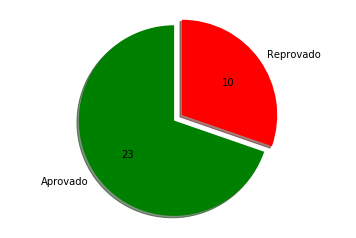

In [44]:
plota_pizza(n_aprovados_t1, n_reprovados_t1)

# Turma 2 2015.2

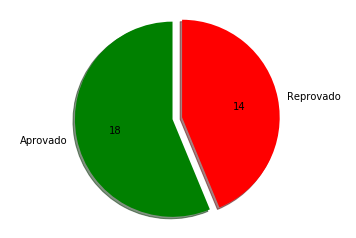

In [45]:
plota_pizza(n_aprovados_t2, n_reprovados_t2)

In [46]:
aprovados_2015_2_t1 = alunos_2015_2_t1[alunos_2015_2_t1['descricao'].str.contains('APROVADO')]
n_aprovados_t1 = len(aprovados_2015_2_t1)/3
reprovados_2015_2_t1 = alunos_2015_2_t1[alunos_2015_2_t1['descricao'].str.contains('REPROVADO')]
n_reprovados_t1 = len(reprovados_2015_2_t1)/3
print("A quantidade de alunos aprovados na disciplina em 2015.2 foi (turma 1): ", n_aprovados_t1)
print("A quantidade de alunos reprovados na disciplina em 2015.2 foi (turma 1): ", n_reprovados_t1)
aprovados_2015_2 = alunos_2015_2_t2[alunos_2015_2_t2['descricao'].str.contains('APROVADO')]
n_aprovados_t2 = len(aprovados_2015_2)/3
reprovados_2015_2 = alunos_2015_2_t2[alunos_2015_2_t2['descricao'].str.contains('REPROVADO')]
n_reprovados_t2 = len(reprovados_2015_2)/3
print("A quantidade de alunos aprovados na disciplina em 2015.2 foi (turma 2): ", n_aprovados_t2)
print("A quantidade de alunos reprovados na disciplina em 2015.2 foi (turma 2): ", n_reprovados_t2)


print("O percentual de aprovação na 1a turma de 2015.2 foi: ", n_aprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de reprovação na 1a turma de 2015.2 foi: ", n_reprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de aprovação na 2a turma de 2015.2 foi: ", n_aprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("O percentual de reprovação na 2a turma de 2015.2 foi: ", n_reprovados_t2/(n_aprovados_t2+n_reprovados_t2))

A quantidade de alunos aprovados na disciplina em 2015.2 foi (turma 1):  5.0
A quantidade de alunos reprovados na disciplina em 2015.2 foi (turma 1):  13.0
A quantidade de alunos aprovados na disciplina em 2015.2 foi (turma 2):  15.0
A quantidade de alunos reprovados na disciplina em 2015.2 foi (turma 2):  28.0
O percentual de aprovação na 1a turma de 2015.2 foi:  0.2777777777777778
O percentual de reprovação na 1a turma de 2015.2 foi:  0.7222222222222222
O percentual de aprovação na 2a turma de 2015.2 foi:  0.3488372093023256
O percentual de reprovação na 2a turma de 2015.2 foi:  0.6511627906976745


# Turma 1 2015.2

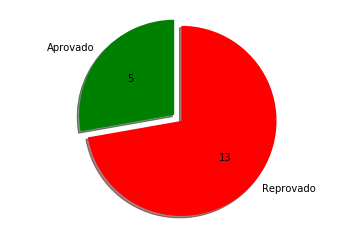

In [47]:
plota_pizza(n_aprovados_t1, n_reprovados_t1)

# Turma 2 2015.2

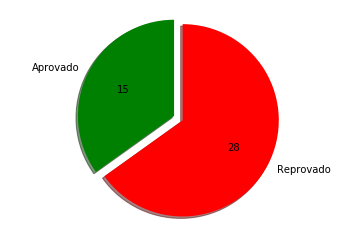

In [48]:
plota_pizza(n_aprovados_t2, n_reprovados_t2)

In [49]:
aprovados_2016_1_t1 = alunos_2016_1_t1[alunos_2016_1_t1['descricao'].str.contains('APROVADO')]
n_aprovados_t1 = len(aprovados_2016_1_t1)/3
reprovados_2016_1_t1 = alunos_2016_1_t1[alunos_2016_1_t1['descricao'].str.contains('REPROVADO')]
n_reprovados_t1 = len(reprovados_2016_1_t1)/3
print("A quantidade de alunos aprovados na disciplina em 2016.1 foi (turma 1): ", n_aprovados_t1)
print("A quantidade de alunos reprovados na disciplina em 2016.1 foi (turma 1): ", n_reprovados_t1)

aprovados_2016_1_t2 = alunos_2016_1_t2[alunos_2016_1_t2['descricao'].str.contains('APROVADO')]
n_aprovados_t2 = len(aprovados_2016_1_t2)/3
reprovados_2016_1_t2 = alunos_2016_1_t2[alunos_2016_1_t2['descricao'].str.contains('REPROVADO')]
n_reprovados_t2 = len(reprovados_2016_1_t2)/3
print("A quantidade de alunos aprovados na disciplina em 2016.1 foi (turma 2): ", n_aprovados_t2)
print("A quantidade de alunos reprovados na disciplina em 2016.1 foi (turma 2): ", n_reprovados_t2)

aprovados_2016_1_t3 = alunos_2016_1_t3[alunos_2016_1_t3['descricao'].str.contains('APROVADO')]
n_aprovados_t3 = len(aprovados_2016_1_t3)/3
reprovados_2016_1_t3 = alunos_2016_1_t3[alunos_2016_1_t3['descricao'].str.contains('REPROVADO')]
n_reprovados_t3 = len(reprovados_2016_1_t3)/3
print("A quantidade de alunos aprovados na disciplina em 2016.1 foi (turma 3): ", n_aprovados_t3)
print("A quantidade de alunos reprovados na disciplina em 2016.1 foi (turma 3): ", n_reprovados_t3)

print("O percentual de aprovação na 1a turma de 2016.1 foi: ", n_aprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de reprovação na 1a turma de 2016.1 foi: ", n_reprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de aprovação na 2a turma de 2016.1 foi: ", n_aprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("O percentual de reprovação na 2a turma de 2016.1 foi: ", n_reprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("O percentual de aprovação na 3a turma de 2016.1 foi: ", n_aprovados_t3/(n_aprovados_t3+n_reprovados_t3))
print("O percentual de reprovação na 3a turma de 2016.1 foi: ", n_reprovados_t3/(n_aprovados_t3+n_reprovados_t3))

A quantidade de alunos aprovados na disciplina em 2016.1 foi (turma 1):  11.0
A quantidade de alunos reprovados na disciplina em 2016.1 foi (turma 1):  25.0
A quantidade de alunos aprovados na disciplina em 2016.1 foi (turma 2):  11.0
A quantidade de alunos reprovados na disciplina em 2016.1 foi (turma 2):  13.0
A quantidade de alunos aprovados na disciplina em 2016.1 foi (turma 3):  5.0
A quantidade de alunos reprovados na disciplina em 2016.1 foi (turma 3):  26.0
O percentual de aprovação na 1a turma de 2016.1 foi:  0.3055555555555556
O percentual de reprovação na 1a turma de 2016.1 foi:  0.6944444444444444
O percentual de aprovação na 2a turma de 2016.1 foi:  0.4583333333333333
O percentual de reprovação na 2a turma de 2016.1 foi:  0.5416666666666666
O percentual de aprovação na 3a turma de 2016.1 foi:  0.16129032258064516
O percentual de reprovação na 3a turma de 2016.1 foi:  0.8387096774193549


# Turma 1 2016.1

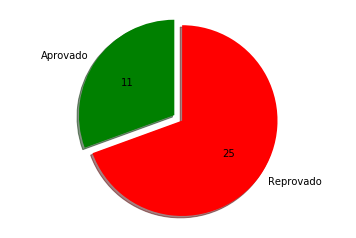

In [50]:
plota_pizza(n_aprovados_t1, n_reprovados_t1)

# Turma 2 2016.1

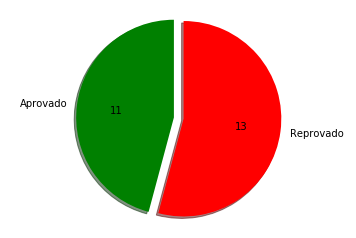

In [51]:
plota_pizza(n_aprovados_t2, n_reprovados_t2)

# Turma 3 2016.1

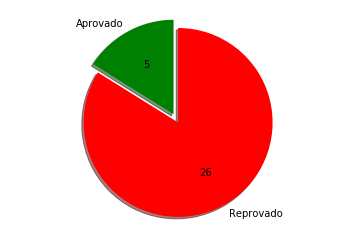

In [52]:
plota_pizza(n_aprovados_t3, n_reprovados_t3)

In [53]:
aprovados_2016_2_t1 = alunos_2016_2_t1[alunos_2016_2_t1['descricao'].str.contains('APROVADO')]
n_aprovados_t1 = len(aprovados_2016_2_t1)/3
reprovados_2016_2_t1 = alunos_2016_2_t1[alunos_2016_2_t1['descricao'].str.contains('REPROVADO')]
n_reprovados_t1 = len(reprovados_2016_2_t1)/3
print("A quantidade de alunos aprovados na disciplina em 2016.2 foi (turma 1): ", n_aprovados_t1)
print("A quantidade de alunos reprovados na disciplina em 2016.2 foi (turma 1): ", n_reprovados_t1)
aprovados_2016_2_t2 = alunos_2016_2_t2[alunos_2016_2_t2['descricao'].str.contains('APROVADO')]
n_aprovados_t2 = len(aprovados_2016_2_t2)/3
reprovados_2016_2_t2 = alunos_2016_2_t2[alunos_2016_2_t2['descricao'].str.contains('REPROVADO')]
n_reprovados_t2 = len(reprovados_2016_2_t2)/3
print("A quantidade de alunos aprovados na disciplina em 2016.2 foi (turma 2): ", n_aprovados_t2)
print("A quantidade de alunos reprovados na disciplina em 2016.2 foi (turma 2): ", n_reprovados_t2)


print("O percentual de aprovação na 1a turma de 2016.2 foi: ", n_aprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de reprovação na 1a turma de 2016.2 foi: ", n_reprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de aprovação na 2a turma de 2016.2 foi: ", n_aprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("O percentual de reprovação na 2a turma de 2016.2 foi: ", n_reprovados_t2/(n_aprovados_t2+n_reprovados_t2))

A quantidade de alunos aprovados na disciplina em 2016.2 foi (turma 1):  12.0
A quantidade de alunos reprovados na disciplina em 2016.2 foi (turma 1):  40.0
A quantidade de alunos aprovados na disciplina em 2016.2 foi (turma 2):  15.0
A quantidade de alunos reprovados na disciplina em 2016.2 foi (turma 2):  34.0
O percentual de aprovação na 1a turma de 2016.2 foi:  0.23076923076923078
O percentual de reprovação na 1a turma de 2016.2 foi:  0.7692307692307693
O percentual de aprovação na 2a turma de 2016.2 foi:  0.30612244897959184
O percentual de reprovação na 2a turma de 2016.2 foi:  0.6938775510204082


# Turma 1 2016.2

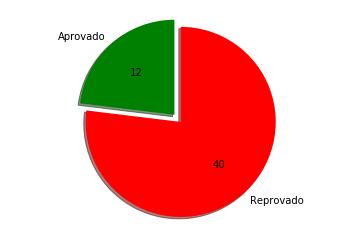

In [54]:
plota_pizza(n_aprovados_t1, n_reprovados_t1)

# Turma 2 2016.2

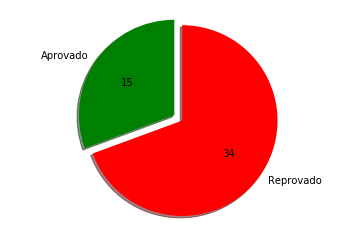

In [55]:
plota_pizza(n_aprovados_t2, n_reprovados_t2)

In [56]:
aprovados_2017_1_t1 = alunos_2017_1_t1[alunos_2017_1_t1['descricao'].str.contains('APROVADO')]
n_aprovados_t1 = len(aprovados_2017_1_t1)/3
reprovados_2017_1_t1 = alunos_2017_1_t1[alunos_2017_1_t1['descricao'].str.contains('REPROVADO')]
n_reprovados_t1 = len(reprovados_2017_1_t1)/3
print("A quantidade de alunos aprovados na disciplina em 2017.1 foi (turma 1): ", n_aprovados_t1)
print("A quantidade de alunos reprovados na disciplina em 2017.1 foi (turma 1): ", n_reprovados_t1)
aprovados_2017_1_t2 = alunos_2017_1_t2[alunos_2017_1_t2['descricao'].str.contains('APROVADO')]
n_aprovados_t2 = len(aprovados_2017_1_t2)/3
reprovados_2017_1_t2 = alunos_2017_1_t2[alunos_2017_1_t2['descricao'].str.contains('REPROVADO')]
n_reprovados_t2 = len(reprovados_2017_1_t2)/3
print("A quantidade de alunos aprovados na disciplina em 2017.1 foi (turma 2): ", n_aprovados_t2)
print("A quantidade de alunos reprovados na disciplina em 2017.1 foi (turma 2): ", n_reprovados_t2)

media_turma1 = np.mean(alunos_fmc2['media_final'].dropna()),
         'mediana_unidade1' : np.median(alunos_fmc2_u1_df['nota']),
         'mediana_unidade2' : np.median(alunos_fmc2_u2_df['nota']),
         'mediana_unidade3' : np.median(alunos_fmc2_u3_df['nota'])}
mediana_fmc2
print("O percentual de aprovação na 1a turma de 2017.1 foi: ", n_aprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de reprovação na 1a turma de 2017.1 foi: ", n_reprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de aprovação na 2a turma de 2017.1 foi: ", n_aprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("O percentual de reprovação na 2a turma de 2017.1 foi: ", n_reprovados_t2/(n_aprovados_t2+n_reprovados_t2))
print("A media da 1a turma foi: " )

A quantidade de alunos aprovados na disciplina em 2017.1 foi (turma 1):  8.0
A quantidade de alunos reprovados na disciplina em 2017.1 foi (turma 1):  30.0
A quantidade de alunos aprovados na disciplina em 2017.1 foi (turma 2):  6.0
A quantidade de alunos reprovados na disciplina em 2017.1 foi (turma 2):  37.0
O percentual de aprovação na 1a turma de 2017.1 foi:  0.21052631578947367
O percentual de reprovação na 1a turma de 2017.1 foi:  0.7894736842105263
O percentual de aprovação na 2a turma de 2017.1 foi:  0.13953488372093023
O percentual de reprovação na 2a turma de 2017.1 foi:  0.8604651162790697


# Turma 1 2017.1

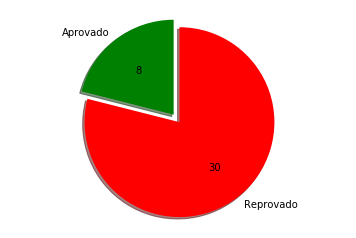

In [57]:
plota_pizza(n_aprovados_t1, n_reprovados_t1)

# Turma 2 2017.1

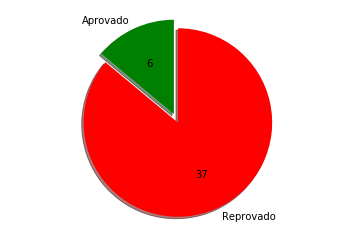

In [58]:
plota_pizza(n_aprovados_t2, n_reprovados_t2)

In [59]:
notas_t1_u1 = alunos_2014_2_t1[alunos_2014_2_t1['unidade'] == 1.0]
notas_t1_u2 = alunos_2014_2_t1[alunos_2014_2_t1['unidade'] == 2.0]
notas_t1_u3 = alunos_2014_2_t1[alunos_2014_2_t1['unidade'] == 3.0]
notas_t1_u1.head(2)

,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
955,1228411,1228411,REPROVADO POR MÉDIA E POR FALTAS,46ca5bcc0383d2734d26bf3bcc201b5a,0.7,2.0,f,1.0,2014.2
958,1228411,1228411,REPROVADO,d4e047d2df4d181e5395b78df93f9811,0.6,0.3,f,1.0,2014.2


# Gráficos mostrando o desemprenho em cada unidade de 2014.2

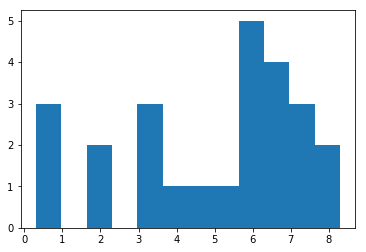

In [60]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u1['nota'], bins=12)
plt.show()

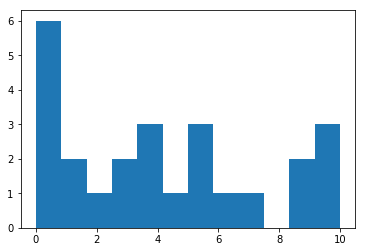

In [61]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u2['nota'], bins=12)
plt.show()

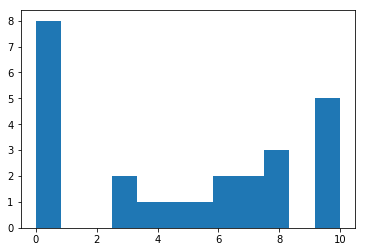

In [62]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u3['nota'], bins=12)
plt.show()

# Media do semestre 2014.2

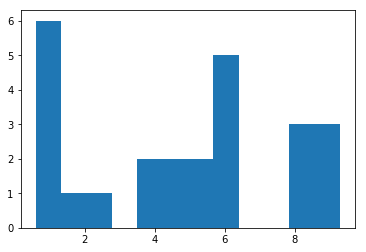

In [63]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u3['media_final'], bins=12)
plt.show()

# Gráficos mostrando o desempenho em cada unidade de 2015.1

In [64]:
notas_t1_u1 = alunos_2015_1_t1[alunos_2015_1_t1['unidade'] == 1.0]
notas_t1_u2 = alunos_2015_1_t1[alunos_2015_1_t1['unidade'] == 2.0]
notas_t1_u3 = alunos_2015_1_t1[alunos_2015_1_t1['unidade'] == 3.0]

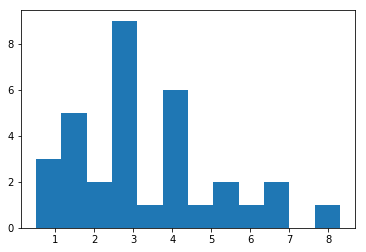

In [65]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u1['nota'], bins=12)
plt.show()

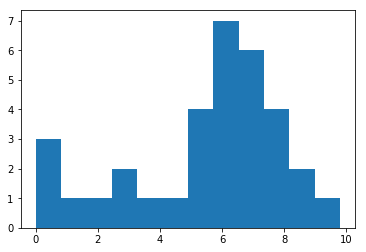

In [66]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u2['nota'], bins=12)
plt.show()

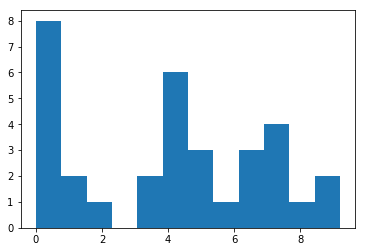

In [67]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u3['nota'], bins=12)
plt.show()

# Média do semestre 2015.1

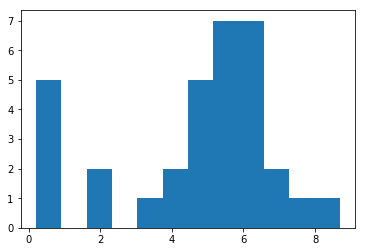

In [68]:
from bokeh.sampledata.iris import flowers as dados
plt.hist(notas_t1_u3['media_final'], bins=12)
plt.show()

# Gráficos mostrando o desempenho em cada unidade de 2015.2

In [69]:
notas_t1_u1 = alunos_2015_2_t1[alunos_2015_2_t1['unidade'] == 1.0]
notas_t1_u2 = alunos_2015_2_t1[alunos_2015_2_t1['unidade'] == 2.0]
notas_t1_u3 = alunos_2015_2_t1[alunos_2015_2_t1['unidade'] == 3.0]

notas_t2_u1 = alunos_2015_2_t2[alunos_2015_2_t2['unidade'] == 1.0]
notas_t2_u2 = alunos_2015_2_t2[alunos_2015_2_t2['unidade'] == 2.0]
notas_t2_u3 = alunos_2015_2_t2[alunos_2015_2_t2['unidade'] == 3.0]

# Gráficos mostrando o desempenho em cada unidade de 2016.1

# Gráficos mostrando o desempenho em cada unidade de 2016.2

# Gráficos mostrando o desempenho em cada unidade de 2017.1

In [70]:
notas_t1_u1 = alunos_2017_1_t1[alunos_2017_1_t1['unidade'] == 1.0]
notas_t1_u2 = alunos_2017_1_t1[alunos_2017_1_t1['unidade'] == 2.0]
notas_t1_u3 = alunos_2017_1_t1[alunos_2017_1_t1['unidade'] == 3.0]

notas_t2_u1 = alunos_2017_1_t2[alunos_2017_1_t2['unidade'] == 1.0]
notas_t2_u2 = alunos_2017_1_t2[alunos_2017_1_t2['unidade'] == 2.0]
notas_t2_u3 = alunos_2017_1_t2[alunos_2017_1_t2['unidade'] == 3.0]

# Turma 1

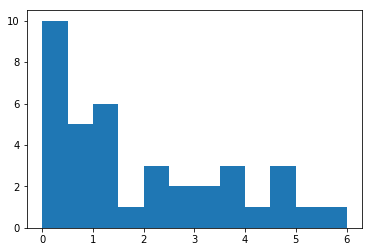

In [71]:
plt.hist(notas_t1_u1['nota'], bins=12)
plt.show()

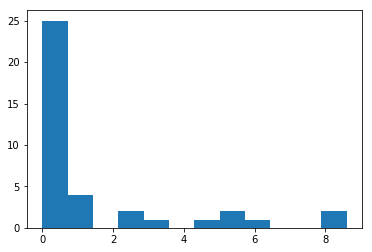

In [72]:
plt.hist(notas_t1_u2['nota'], bins=12)
plt.show()

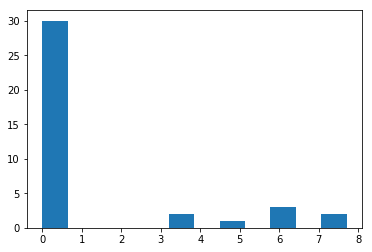

In [73]:
plt.hist(notas_t1_u3['nota'], bins=12)
plt.show()

# Turma 2

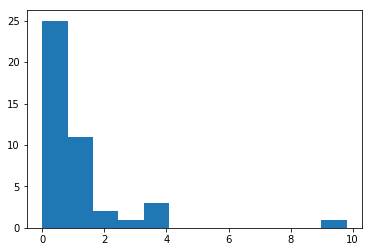

In [74]:
plt.hist(notas_t2_u1['nota'], bins=12)
plt.show()

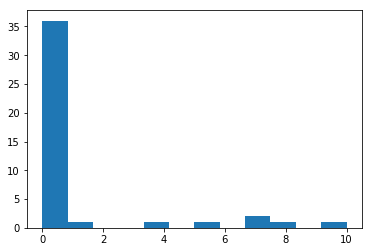

In [75]:
plt.hist(notas_t2_u2['nota'], bins=12)
plt.show()

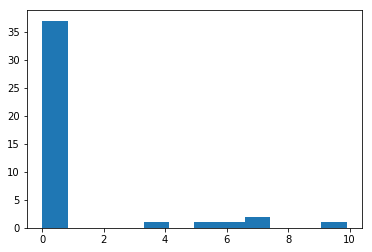

In [76]:
plt.hist(notas_t2_u3['nota'], bins=12)
plt.show()

In [77]:
calculo1 = disciplinas_bti[disciplinas_bti['nome'] == 'CÁLCULO DIFERENCIAL E INTEGRAL I']
calculo1

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,ano_programa,periodo_programa,modalidade,curso_componente
8,52662,MODULO,IMD0024,G,CÁLCULO DIFERENCIAL E INTEGRAL I,90,2013.0,2.0,Presencial,TECNOLOGIA DA INFORMAÇÃO


In [78]:
turmas_calculo1 = []
for cod in calculo1['id_componente'].unique():
    turmas_calculo1.append(turmas_df[turmas_df['id_componente_curricular'] == cod])
turmas_calculo1 = pd.concat(turmas_calculo1, keys=calculo1['id_componente'].unique())
turmas_calculo1.reset_index(inplace=True, level=0)
turmas_calculo1.reset_index(inplace=True, drop='index')
turmas_calculo1.head(2)

,level_0,id_turma,codigo_turma,id_docente_interno,id_docente_externo,id_componente_curricular,ano_periodo,descricao_horario,tipo,situacao_turma
0,52662,1239414,01,5.75621e+06,NaN,52662.0,2015.1,246M56 (02/02/2015 - 20/06/2015),REGULAR,CONSOLIDADA
1,52662,1239414,01,5.75697e+06,NaN,52662.0,2015.1,246M56 (02/02/2015 - 20/06/2015),REGULAR,CONSOLIDADA


In [79]:
alunos_calculo1 = []
for cod in turmas_calculo1['id_turma'].unique():
    alunos_calculo1.append(mat_comp_bti[mat_comp_bti['id_turma'] == np.int64(cod)])
alunos_calculo1 = pd.concat(alunos_calculo1, keys=turmas_calculo1['id_turma'].unique())
alunos_calculo1.reset_index(inplace=True,level=0)
alunos_calculo1.reset_index(inplace=True,drop='index')
alunos_calculo1.head(3)

,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
0,1239414,1239414,APROVADO,f3ac5d986b7350a02d63a22510377d73,8.7,9.0,f,3.0,2015.1
1,1239414,1239414,APROVADO,f3ac5d986b7350a02d63a22510377d73,8.7,7.8,f,1.0,2015.1
2,1239414,1239414,APROVADO,f3ac5d986b7350a02d63a22510377d73,8.7,9.3,f,2.0,2015.1


In [80]:
unidade1 = alunos_calculo1[alunos_calculo1['unidade'] == 1.0]
unidade2 = alunos_calculo1[alunos_calculo1['unidade'] == 2.0]
unidade3 = alunos_calculo1[alunos_calculo1['unidade'] == 3.0]
unidade1.reset_index(drop='index',level=0,inplace=True)
unidade2.reset_index(drop='index',level=0,inplace=True)
unidade3.reset_index(drop='index',level=0,inplace=True)
alunos_calculo1_u1_df = unidade1.drop(['level_0','reposicao','unidade'],axis=1)
alunos_calculo1_u2_df = unidade2.drop(['level_0','reposicao','unidade'],axis=1)
alunos_calculo1_u3_df = unidade3.drop(['level_0','reposicao','unidade'],axis=1)

print(alunos_calculo1_u1_df.descricao.unique())
alunos_calculo1_u1_df.head(3)

['APROVADO' 'APROVADO POR NOTA' 'CANCELADO'
 'REPROVADO POR MÉDIA E POR FALTAS' 'REPROVADO' 'EXCLUIDA' 'TRANCADO'
 'REPROVADO POR NOTA' 'MATRICULADO']


,id_turma,descricao,discente,media_final,nota,ano_periodo
0,1239414,APROVADO,f3ac5d986b7350a02d63a22510377d73,8.7,7.8,2015.1
1,1239414,APROVADO,30327d430572d0c720dcd1682a39c361,7.4,4.5,2015.1
2,1239414,APROVADO POR NOTA,ad1723416caab97b96c630e262481742,6.6,7.4,2015.1


In [81]:
## mantendo apenas os alunos que concluiram a disciplina
alunos_calculo1_u1_df = alunos_calculo1_u1_df[alunos_calculo1_u1_df['descricao'].str.contains('APROVADO') |
                                      alunos_calculo1_u1_df['descricao'].str.contains('REPROVADO')]
alunos_calculo1_u2_df = alunos_calculo1_u2_df[alunos_calculo1_u2_df['descricao'].str.contains('APROVADO') |
                                      alunos_calculo1_u2_df['descricao'].str.contains('REPROVADO')]
alunos_calculo1_u3_df = alunos_calculo1_u3_df[alunos_calculo1_u3_df['descricao'].str.contains('APROVADO') |
                                      alunos_calculo1_u3_df['descricao'].str.contains('REPROVADO')]
print(alunos_calculo1_u1_df.descricao.unique())
alunos_calculo1_u1_df.head(3)

['APROVADO' 'APROVADO POR NOTA' 'REPROVADO POR MÉDIA E POR FALTAS'
 'REPROVADO' 'REPROVADO POR NOTA']


,id_turma,descricao,discente,media_final,nota,ano_periodo
0,1239414,APROVADO,f3ac5d986b7350a02d63a22510377d73,8.7,7.8,2015.1
1,1239414,APROVADO,30327d430572d0c720dcd1682a39c361,7.4,4.5,2015.1
2,1239414,APROVADO POR NOTA,ad1723416caab97b96c630e262481742,6.6,7.4,2015.1


In [82]:
alunos_c1_2017_1 = alunos_calculo1_u1_df[alunos_calculo1_u1_df['ano_periodo'] == '2017.1']
alunos_c1_2017_1.head(2)

,id_turma,descricao,discente,media_final,nota,ano_periodo
325,57597581,APROVADO POR NOTA,f7551a49f55aa01e91a07a8dc82653b9,5.0,4.0,2017.1
328,57597581,REPROVADO,5ff2a17b3e44f4ad386b87374a841675,4.5,0.6,2017.1


In [83]:
aprovados_2017_1_t1 = alunos_c1_2017_1[alunos_c1_2017_1['descricao'].str.contains('APROVADO')]
n_aprovados_t1 = len(aprovados_2017_1_t1)/3
reprovados_2017_1_t1 = alunos_c1_2017_1[alunos_c1_2017_1['descricao'].str.contains('REPROVADO')]
n_reprovados_t1 = len(reprovados_2017_1_t1)/3
print("A quantidade de alunos aprovados na disciplina Calculo 1 em 2015.2 foi (turma 1): ", n_aprovados_t1)
print("A quantidade de alunos reprovados na disciplina em 2015.2 foi (turma 1): ", n_reprovados_t1)
#aprovados_2015_2 = alunos_2015_2_t2[alunos_2015_2_t2['descricao'].str.contains('APROVADO')]
#n_aprovados_t2 = len(aprovados_2015_2)/3
#reprovados_2015_2 = alunos_2015_2_t2[alunos_2015_2_t2['descricao'].str.contains('REPROVADO')]
#n_reprovados_t2 = len(reprovados_2015_2)/3
#print("A quantidade de alunos aprovados na disciplina em 2015.2 foi (turma 2): ", n_aprovados_t2)
#print("A quantidade de alunos reprovados na disciplina em 2015.2 foi (turma 2): ", n_reprovados_t2)


print("O percentual de aprovação na 1a turma de 2015.2 foi: ", n_aprovados_t1/(n_aprovados_t1+n_reprovados_t1))
print("O percentual de reprovação na 1a turma de 2015.2 foi: ", n_reprovados_t1/(n_aprovados_t1+n_reprovados_t1))
#print("O percentual de aprovação na 2a turma de 2015.2 foi: ", n_aprovados_t2/(n_aprovados_t2+n_reprovados_t2))
#print("O percentual de reprovação na 2a turma de 2015.2 foi: ", n_reprovados_t2/(n_aprovados_t2+n_reprovados_t2))

A quantidade de alunos aprovados na disciplina Calculo 1 em 2015.2 foi (turma 1):  13.333333333333334
A quantidade de alunos reprovados na disciplina em 2015.2 foi (turma 1):  14.0
O percentual de aprovação na 1a turma de 2015.2 foi:  0.4878048780487805
O percentual de reprovação na 1a turma de 2015.2 foi:  0.5121951219512195


In [84]:
alunos_calculo1_u1_df

,id_turma,descricao,discente,media_final,nota,ano_periodo
0,1239414,APROVADO,f3ac5d986b7350a02d63a22510377d73,8.7,7.8,2015.1
1,1239414,APROVADO,30327d430572d0c720dcd1682a39c361,7.4,4.5,2015.1
2,1239414,APROVADO POR NOTA,ad1723416caab97b96c630e262481742,6.6,7.4,2015.1
3,1239414,APROVADO POR NOTA,5b3d2761e4cc4619686d665c914585fd,6.7,8.0,2015.1
4,1239414,APROVADO,e8276e72614c5828286b43d50704d1a0,7.7,6.5,2015.1
5,1239414,APROVADO,48bda966ddad288bba1f680237cdef70,8.4,6.1,2015.1
6,1239414,APROVADO,35e2507cc2ed396f7078879369b27286,9.0,10.0,2015.1
7,1239414,APROVADO,5dac5cab88de4928bbc3095150f768ff,7.6,8.0,2015.1
8,1239414,APROVADO,00bd67a601192f51da746e41e60815c7,8.2,8.3,2015.1
9,1239414,APROVADO,3797d070ee3c0d06f8ca9e32d970dc0e,10.0,10.0,2015.1


In [85]:
## Calculando as médias e desvios padrões por unidades
media_calculo1 = {'media_geral' : np.mean(alunos_calculo1['media_final']),
         'media_unidade1' : np.mean(alunos_calculo1_u1_df['nota']),
         'media_unidade2' : np.mean(alunos_calculo1_u2_df['nota']),
         'media_unidade3' : np.mean(alunos_calculo1_u3_df['nota'])}
std_calculo1 = {'desvio_padrao' : np.std(alunos_calculo1['media_final']),
       'desvio_padrao_u1' : np.std(alunos_calculo1_u1_df['nota']),
       'desvio_padrao_u2' : np.std(alunos_calculo1_u2_df['nota']),
       'desvio_padrao_u3' : np.std(alunos_calculo1_u3_df['nota'])}
medias_calculo1 = pd.DataFrame.from_dict(media_calculo1,orient='index')
stds_calculo1 = pd.DataFrame.from_dict(std_calculo1,orient='index')
medias_calculo1 = pd.DataFrame.transpose(medias_calculo1);
stds_calculo1 = pd.DataFrame.transpose(stds_calculo1);

medias_calculo1_df = pd.concat([medias_calculo1,stds_fmc2],axis=1)
medias_calculo1_df = medias_calculo1_df.dropna()
medias_calculo1_df

,media_geral,media_unidade1,media_unidade2,media_unidade3,desvio_padrao,desvio_padrao_u1,desvio_padrao_u2,desvio_padrao_u3
0,3.524825,4.619087,3.584786,3.039834,2.704475,2.637742,2.995006,3.073023


In [86]:
def z_score(mean, std_dev):

    ## casting axis x values to int
    mean = int(mean*10)
    std_dev = int(std_dev*10)

    axis_x = [i*1.0 for i in range(0,100)]

    xi = bkmdl.widgets.Slider(title='xi',start=0,end=100,step=1,value=50)
    ## return the cumulative value from Z-Table
    cdf = stats.norm.cdf(int(xi.value),mean, std_dev)

    ## widget to show probability
    prob = bkmdl.widgets.TextInput(title='cdf',value=str(cdf))

    ## -2std, -std, std, 2std 
    minus2std = int(mean - 2*std_dev)
    minusstd = int(mean - std_dev)
    plus1std = int(mean + std_dev)
    plus2std = int(mean + 2*std_dev)

    ## mark points in the plot
    markers_points = [minus2std, minusstd, mean, plus1std, plus2std]

    ## find the probability distribution function
    pdf = stats.norm.pdf(axis_x,mean,std_dev)

    hover = bkmdl.HoverTool(tooltips=[('Nota','$x')])

    plot = bkplt.figure(plot_width=450, plot_height=450, tools=[hover])

    ## sources
    pdf_source = bkmdl.ColumnDataSource(dict(x=axis_x,y=pdf))
    xi_source = bkmdl.ColumnDataSource(dict(x=[int(xi.value) for i in pdf],y=pdf))
    mean_source = bkmdl.ColumnDataSource(dict(x=[mean],y=[pdf[mean]]))
    if minus2std > 0:
        minus2std_source = bkmdl.ColumnDataSource(dict(x=[minus2std],y=[pdf[minus2std]]))
    if minusstd > 0:
        minusstd_source = bkmdl.ColumnDataSource(dict(x=[minusstd],y=[pdf[minusstd]]))
    if plus1std < 100:
        plus1std_source = bkmdl.ColumnDataSource(dict(x=[plus1std],y=[pdf[plus1std]]))
    if plus2std < 100:
        plus2std_source = bkmdl.ColumnDataSource(dict(x=[plus2std],y=[pdf[plus2std]]))

    ## plots
    plot.line('x', 'y', color='blue', source=pdf_source)
    plot.line('x', 'y', color='orange',source=xi_source)
    plot.diamond('x', 'y', legend='media', color='green', size=10, source=mean_source)
    if minus2std > 0:
        plot.diamond('x', 'y', legend='-2*desvio', color='cyan', size=10, source=minus2std_source)
    if minusstd > 0:
        plot.diamond('x', 'y', legend='-desvio', color='purple', size=10, source=minusstd_source)
    if plus1std < 100:
        plot.diamond('x', 'y', legend='desvio', color='red', size=10, source=plus1std_source)
    if plus2std < 100:
        plot.diamond('x', 'y', legend='2*desvio', color='pink', size=10, source=plus2std_source)
        
    
    def update_xi(attrname, old, new):
        # Generate the new line
        source.data = dict(x=[int(xi.value) for i in pdf],y=pdf)
        
        cdf = stats.norm.cdf(int(xi.value),mean, std_dev)
        prob.value = str(cdf)


    xi.on_change('value',update_xi)

    graph = bklt.column(bklt.widgetbox(xi,prob),plot)

    bkio.output_notebook()
    
    return graph

In [87]:
## Ploting interactive graphics with bokeh
## points under analises
mean_u1 = (medias_calculo1_df['media_unidade1'])
std_dev_u1 = (medias_calculo1_df['desvio_padrao_u1'])
graph_u1 = z_score(mean_u1,std_dev_u1)

mean_u2 = (medias_calculo1_df['media_unidade2'])
std_dev_u2 = (medias_calculo1_df['desvio_padrao_u2'])
graph_u2 = z_score(mean_u2,std_dev_u2)

mean_u3 = (medias_calculo1_df['media_unidade3'])
std_dev_u3 = (medias_calculo1_df['desvio_padrao_u3'])
graph_u3 = z_score(mean_u3,std_dev_u1)

mean = (medias_calculo1_df['media_geral'])
std_dev = (medias_calculo1_df['desvio_padrao'])
graph_geral = z_score(mean,std_dev)

panel_u1 = bkmdl.Panel(child=graph_u1,title='Unidade 1')
panel_u2 = bkmdl.Panel(child=graph_u2,title='Unidade 2')
panel_u3 = bkmdl.Panel(child=graph_u3,title='Unidade 3')
panel = bkmdl.Panel(child=graph_geral,title='Média')

tabs = bkmdl.widgets.Tabs(tabs=[panel_u1,panel_u2,panel_u3,panel])
bkio.show(tabs)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...